In [127]:
from rdkit import Chem
import os
os.chdir("../") #Exit notebooks folder to import armadillo
import MDAnalysis as mda
from armadillo import armadillo
import warnings
warnings.filterwarnings('ignore')
import nglview as nv

RingGroup properties:
smiles= c1ccccc1


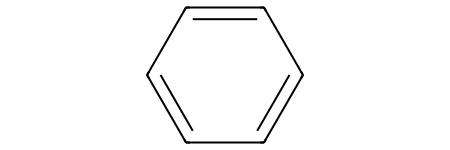

In [35]:
#Define RingGroup
class RingGroup:
    """A class to define properties of a ring group in a universe"""
    def __init__(self, smiles):
        self.s = smiles

ring = RingGroup('c1ccccc1')
print("RingGroup properties:") 
print("smiles=", ring.s)
Chem.MolFromSmiles(ring.s)

### Armadillo Demo

In [154]:
#Define an MDAnalysis universe from example data
from MDAnalysis.tests.datafiles import PSF_NAMD_GBIS, DCD_NAMD_GBIS
u = mda.Universe(PSF_NAMD_GBIS, DCD_NAMD_GBIS)

In [155]:
nv.show_mdanalysis(u)

NGLWidget(max_frame=99)

In [159]:
ag = sum(u.atoms.fragments[:20]) 
ag

<AtomGroup with 3341 atoms>

In [157]:
#Find all the rings in the universe
ring_list = armadillo.find_all_rings(ag, u)
ring_list[:6]

[<AtomGroup with 5 atoms>,
 <AtomGroup with 6 atoms>,
 <AtomGroup with 6 atoms>,
 <AtomGroup with 6 atoms>,
 <AtomGroup with 5 atoms>,
 <AtomGroup with 5 atoms>]

In [167]:
#Names of residues in ring_list
residues = [x.residues.resnames[0] for x in ring_list]
residues[:6]

['PRO', 'TYR', 'TYR', 'TYR', 'PRO', 'HSE']

In [175]:
len(residues)

25

In [174]:
#Look at ring groups
view = nv.show_file(u)
view.add_ball_and_stick("ring")
view

NGLWidget()

In [160]:
#Calculate the distance between 2 rings in the ring list using ring_distance
armadillo.ring_distance(ring_list[0], ring_list[1], ag)

21.721455161608834

In [161]:
#Calculate the angle in degrees between 2 rings in the ring list using ring_normal_angle
armadillo.ring_normal_angle(ring_list[0], ring_list[4])

67.801186

In [162]:
#Ad hoc test to determmine if pi-stacking has occurred by testing distance and alpha angle
armadillo.pi_stacking(ring_list[0], ring_list[1], ag, 5, 80)

False

In [163]:
#Find pi stacking rings in the ring list
armadillo.find_pi_stacking_rings(ring_list, ag)

([], [])

In [164]:
pi_parallel_stacking=[]
pi_t_shaped = []
for ts in u.trajectory[:25:5]:
    parallel_stacking, t_shaped = armadillo.find_pi_stacking_rings(ring_list, ag)
    pi_parallel_stacking.append(parallel_stacking)
    pi_t_shaped.append(t_shaped)

In [165]:
pi_parallel_stacking

[[], [], [], [], []]

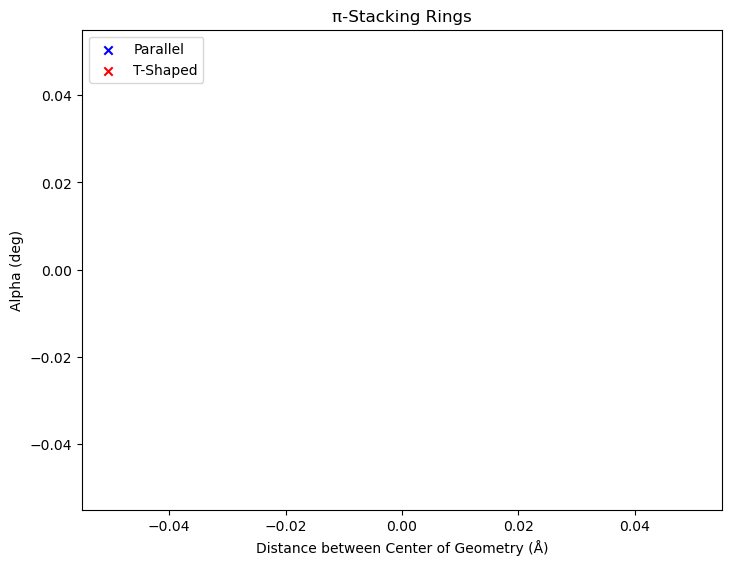

In [166]:
#Plot a graph to show the distribution of pi stacking (parallel and T-shaped) between
armadillo.pi_stacking_distribution(pi_parallel_stacking[4], pi_t_shaped[4], ring_list, ag, u, frame=20)